In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
gold_data = pd.read_csv('C:\\Users\\Legion\\Downloads\\archive\\gld_price_data.csv')


In [5]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values
gold_data.isnull().sum()


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
correlation = gold_data.select_dtypes(include=['number']).corr()
print(correlation)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [21]:
print(gold_data.dtypes)


Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


<Axes: >

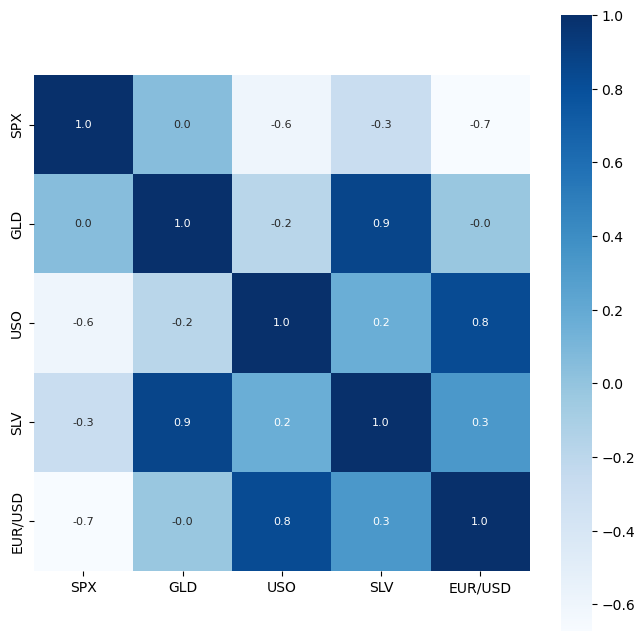

In [22]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [23]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


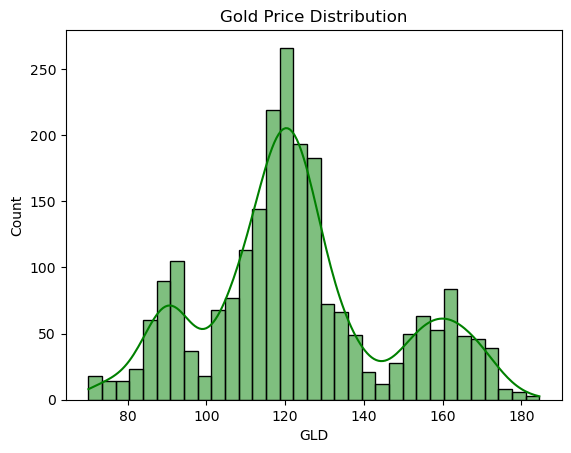

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(gold_data['GLD'], color='green', kde=True)
plt.title('Gold Price Distribution')
plt.show()


In [27]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [28]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [30]:
regressor = RandomForestRegressor(n_estimators=100)

In [31]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [32]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [33]:
print(test_data_prediction)

[168.86009964  82.00259995 115.96610008 127.572301   120.54680129
 154.58579754 149.93559824 126.16209993 117.38999875 125.92790031
 116.98440085 171.64900084 141.73089893 167.65309857 115.27569998
 117.58220058 137.60390305 169.81220071 159.11340265 156.967699
 155.25170006 125.29320027 175.46989985 157.21250261 125.2062006
  93.83229985  77.8839     120.5098001  119.08699916 167.33279958
  88.05480065 125.31400024  90.94940087 117.6361001  121.2214994
 136.1649004  115.41520097 115.32960052 148.76150009 107.42040103
 104.64220259  87.07389787 126.50260074 117.84329993 153.01119907
 119.74560033 108.48129981 108.16479868  93.1001003  127.05279799
  74.89690003 113.57069892 121.46920017 111.28219933 118.82239886
 120.59169906 160.07670021 168.34150071 146.97919674  85.73879832
  94.11050033  86.70489819  90.45740021 118.89470072 126.38930065
 127.50679972 169.38750021 122.28379938 117.18419922  98.22560012
 168.49140142 143.4011989  132.08410254 121.2189021  120.9337996
 119.79480092 1

In [34]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888137001356353


In [35]:
# Compare the Actual Values and Predicted Values in a Plot
Y_test = list(Y_test)

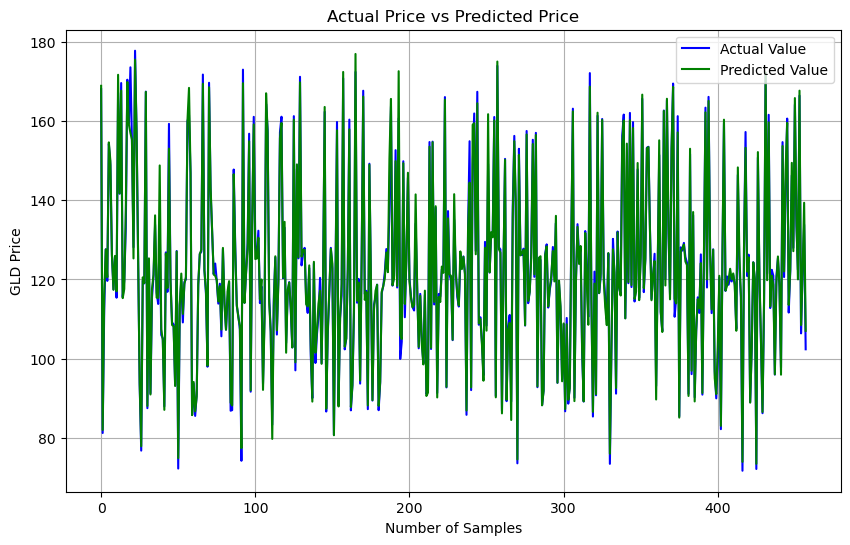

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))  # Optional: make the plot wider
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Samples')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(True)
plt.show()



import matplotlib.pyplot as plt

# Display top 10 as a table chart
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
table = ax.table(cellText=comparison_df.head(10).values,
                 colLabels=comparison_df.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title("Actual vs Predicted GLD Prices (Top 10)", fontsize=12)
plt.show()


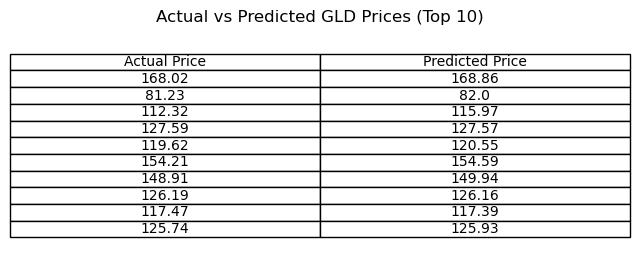

In [40]:
import matplotlib.pyplot as plt

# Display top 10 as a table chart
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
table = ax.table(cellText=comparison_df.head(10).values,
                 colLabels=comparison_df.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title("Actual vs Predicted GLD Prices (Top 10)", fontsize=12)
plt.show()
